In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from svm import SVM

In [2]:
def plot_line(svm, X, y):
    b = svm.b
    x1, _ = max(X, key=lambda x: x[0])
    x2, _ = min(X, key=lambda x: x[0])
    a1, a2 = svm.get_w()
    y1, y2 = (-b - a1*x1)/a2, (-b - a1*x2)/a2
    plt.plot([x1, x2], [y1, y2])

    y1, y2 = (-b - 1 - a1 * x1) / a2, (-b - 1 - a1 * x2) / a2
    plt.plot([x1, x2], [y1, y2], 'b--')

    y1, y2 = (-b + 1 - a1 * x1) / a2, (-b + 1 - a1 * x2) / a2
    plt.plot([x1, x2], [y1, y2], 'b--')

    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
    plt.show()

In [3]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

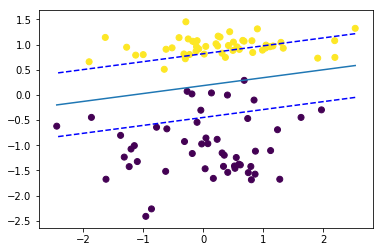

In [103]:
X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=1)
y[y == 0] = -1
my_svm = SVM(c=1.331, max_iter=10000)
my_svm.fit(X, y)

plot_line(my_svm, X, y)

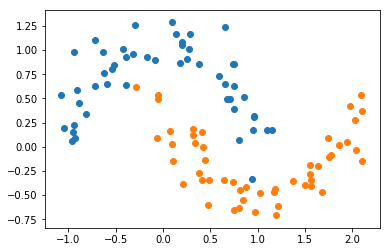

In [5]:
X, y = datasets.make_moons(noise=0.15, random_state=888)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

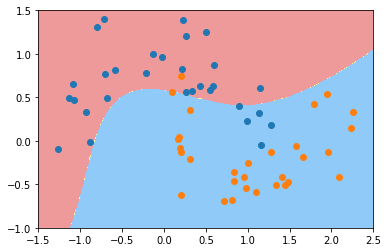

In [16]:
X, y = datasets.make_moons(n_samples=60,noise=0.20, random_state=888)
y[y != 1] = -1
my_svm = SVM(c=2.0, kernel='poly', max_iter=20000, p=4)
my_svm.fit(X, y)
plot_decision_boundary(my_svm, axis=[-1.5, 2.5, -1.0, 1.5])

plt.scatter(X[y == -1, 0], X[y == -1, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

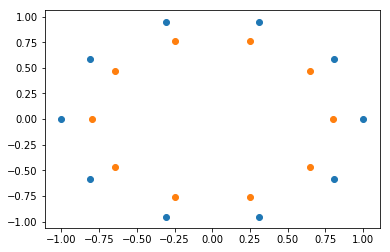

In [51]:
X, y = datasets.make_circles(n_samples=20, random_state=666)
y[y != 1] = -1

plt.scatter(X[y == -1, 0], X[y == -1, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

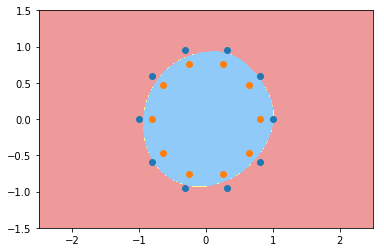

In [54]:
my_svm = SVM(c=10, kernel='rbf', max_iter=1000, gamma=3.5)
my_svm.fit(X, y)
plot_decision_boundary(my_svm, axis=[-2.5, 2.5, -1.5, 1.5])
plt.scatter(X[y == -1, 0], X[y == -1, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

C:\Users\ANG_Z\Miniconda3\envs\ml\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


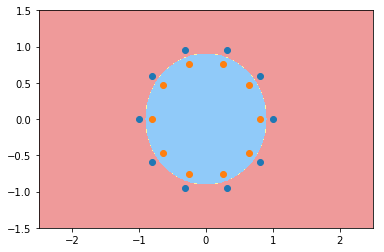

In [55]:
from sklearn.svm import SVC

rbf_svc = SVC(C=1, gamma=1)
rbf_svc.fit(X, y)

plot_decision_boundary(rbf_svc, axis=[-2.5, 2.5, -1.5, 1.5])
plt.scatter(X[y == -1, 0], X[y == -1, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()